# Analysis of K3 Tensor Scaling Laws

We analyze how the largest eigenvalue and infinity norm of the K3 tensor scale with respect to:
- Network depth (L)
- Network width (M) 
- Input dimension (D)
- Number of samples (N)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
PATH_TO_DATA = "/home/janis/STG3A/deeperorwider/experiments/data/large"
files = os.listdir(PATH_TO_DATA)
data = []

for f in files:
    if f.startswith("k3_analysis_"):
        d = np.load(os.path.join(PATH_TO_DATA, f), allow_pickle=True).item()
        data.append(d)

## Scaling Laws Analysis

In [ ]:
def analyze_parameter_scaling(data, param_name, plot_size=(20, 15)):  # we increase figure size
    other_params = ['N', 'D_IN', 'M', 'L']
    other_params.remove(param_name)
    
    groups = {}
    for d in data:
        key = tuple(d[p] for p in other_params)
        if key not in groups:
            groups[key] = []
        max_eigenvalue = np.max(np.abs(d['mean_eigenvalues']))  # we get largest eigenvalue
        groups[key].append((d[param_name], d['inf_norm'], max_eigenvalue))
    
    # Create figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=plot_size)
    
    # Plot 1: Infinity Norm vs Parameter (Linear Scale)
    ax = axes[0,0]
    for key, values in groups.items():
        sorted_values = sorted(values, key=lambda x: x[0])  # we sort by parameter value
        x = [v[0] for v in sorted_values]
        y = [v[1] for v in sorted_values]
        ax.scatter(x, y, label=str(key), s=100)  # we use scatter plot with larger markers
    ax.set_xlabel(param_name)
    ax.set_ylabel('Infinity Norm')
    ax.set_title(f'K3 Infinity Norm vs {param_name} (Linear)')
    ax.grid(True)
    
    # Plot 2: Infinity Norm vs Parameter (Log Scale)
    ax = axes[0,1]
    for key, values in groups.items():
        sorted_values = sorted(values, key=lambda x: x[0])  # we sort by parameter value
        x = [v[0] for v in sorted_values]
        y = [v[1] for v in sorted_values]
        ax.scatter(x, y, label=str(key), s=100)  # we use scatter plot with larger markers
        
        if len(x) > 1:  # we fit power law if enough points
            slope, intercept, r_value, p_value, std_err = linregress(np.log(x), np.log(y))
            x_line = np.array(sorted(x))  # we use sorted x values for line
            ax.plot(x_line, np.exp(intercept) * x_line**slope, '--',
                    label=f'slope={slope:.2f}')
    ax.set_xlabel(param_name)
    ax.set_ylabel('Infinity Norm')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f'K3 Infinity Norm vs {param_name} (Log)')
    ax.grid(True)
    
    # Plot 3: Largest Eigenvalue vs Parameter (Linear Scale)
    ax = axes[1,0]
    for key, values in groups.items():
        sorted_values = sorted(values, key=lambda x: x[0])  # we sort by parameter value
        x = [v[0] for v in sorted_values]
        y = [v[2] for v in sorted_values]
        ax.scatter(x, y, label=str(key), s=100)  # we use scatter plot with larger markers
    ax.set_xlabel(param_name)
    ax.set_ylabel('Largest Eigenvalue')
    ax.set_title(f'K3 Largest Eigenvalue vs {param_name} (Linear)')
    ax.grid(True)
    
    # Plot 4: Largest Eigenvalue vs Parameter (Log Scale)
    ax = axes[1,1]
    for key, values in groups.items():
        sorted_values = sorted(values, key=lambda x: x[0])  # we sort by parameter value
        x = [v[0] for v in sorted_values]
        y = [v[2] for v in sorted_values]
        ax.scatter(x, y, label=str(key), s=100)  # we use scatter plot with larger markers
        
        if len(x) > 1:  # we fit power law if enough points
            slope, intercept, r_value, p_value, std_err = linregress(np.log(x), np.log(y))
            x_line = np.array(sorted(x))  # we use sorted x values for line
            ax.plot(x_line, np.exp(intercept) * x_line**slope, '--',
                    label=f'slope={slope:.2f}')
    ax.set_xlabel(param_name)
    ax.set_ylabel('Largest Eigenvalue')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f'K3 Largest Eigenvalue vs {param_name} (Log)')
    ax.grid(True)
    
    # Add legend outside plots
    handles, labels = axes[1,1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.15, 0.5))
    
    plt.tight_layout()
    plt.show()

Analyzing depth (L) scaling relationships...


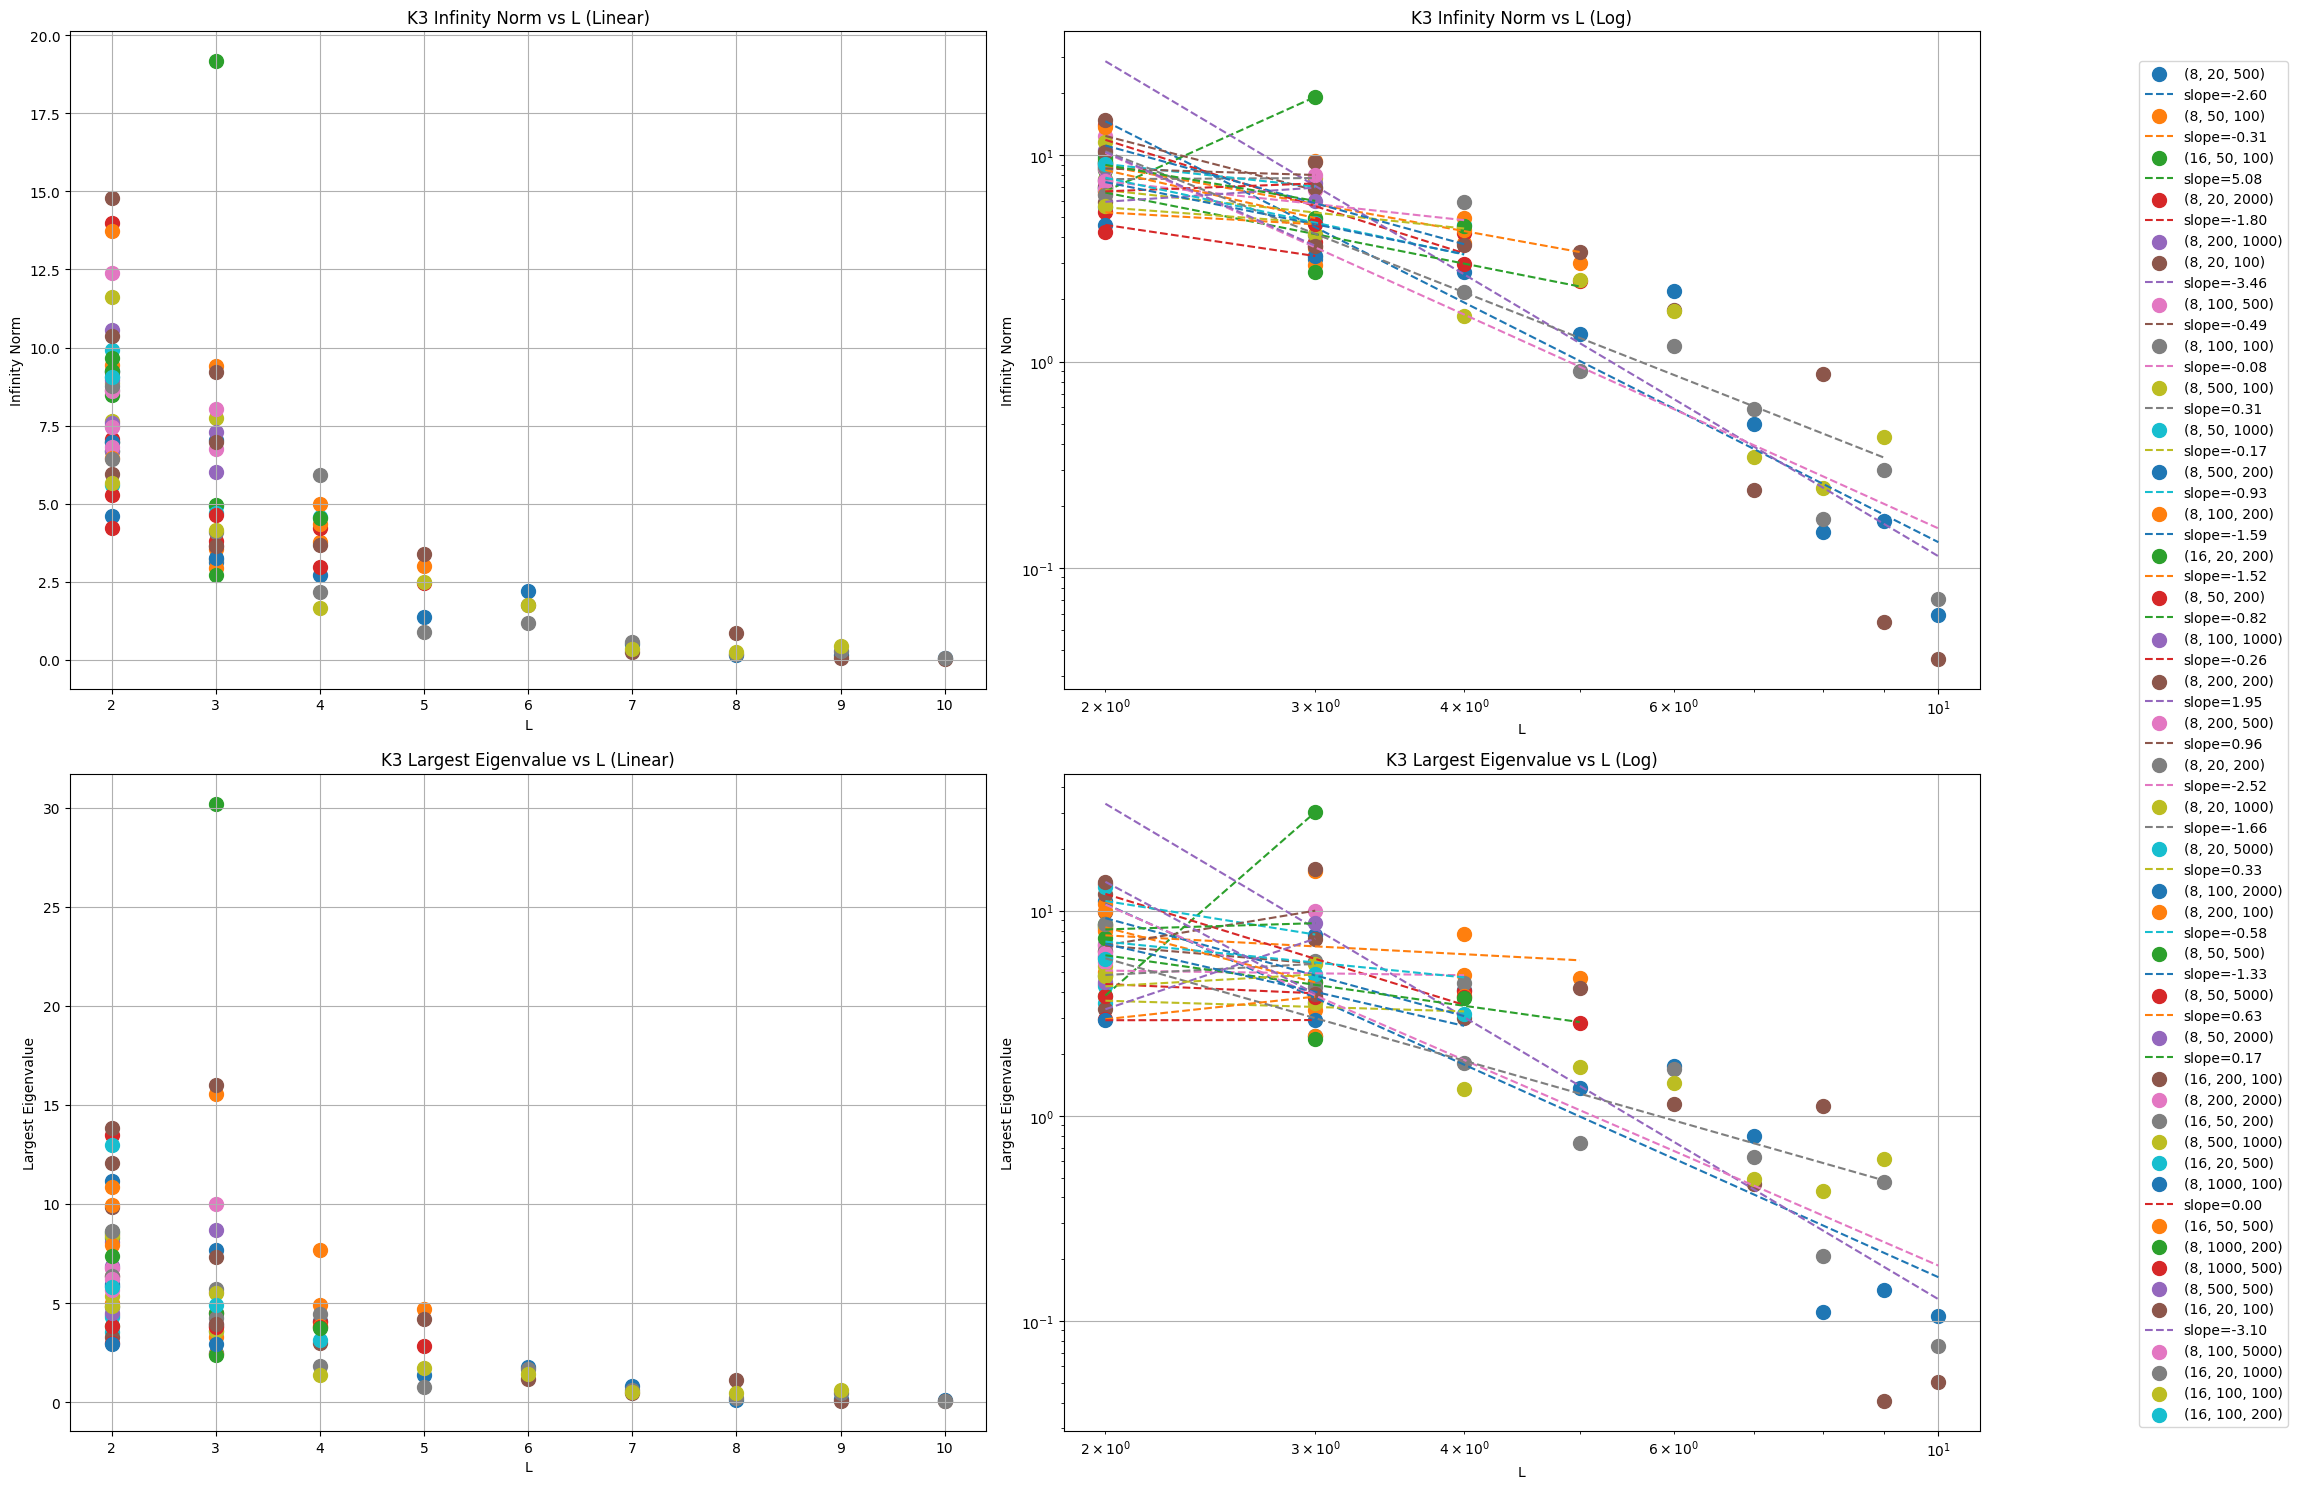

In [ ]:
# Analyze depth scaling
print("Analyzing depth (L) scaling relationships...")
analyze_parameter_scaling(data, 'L')

Analyzing width (M) scaling relationships...


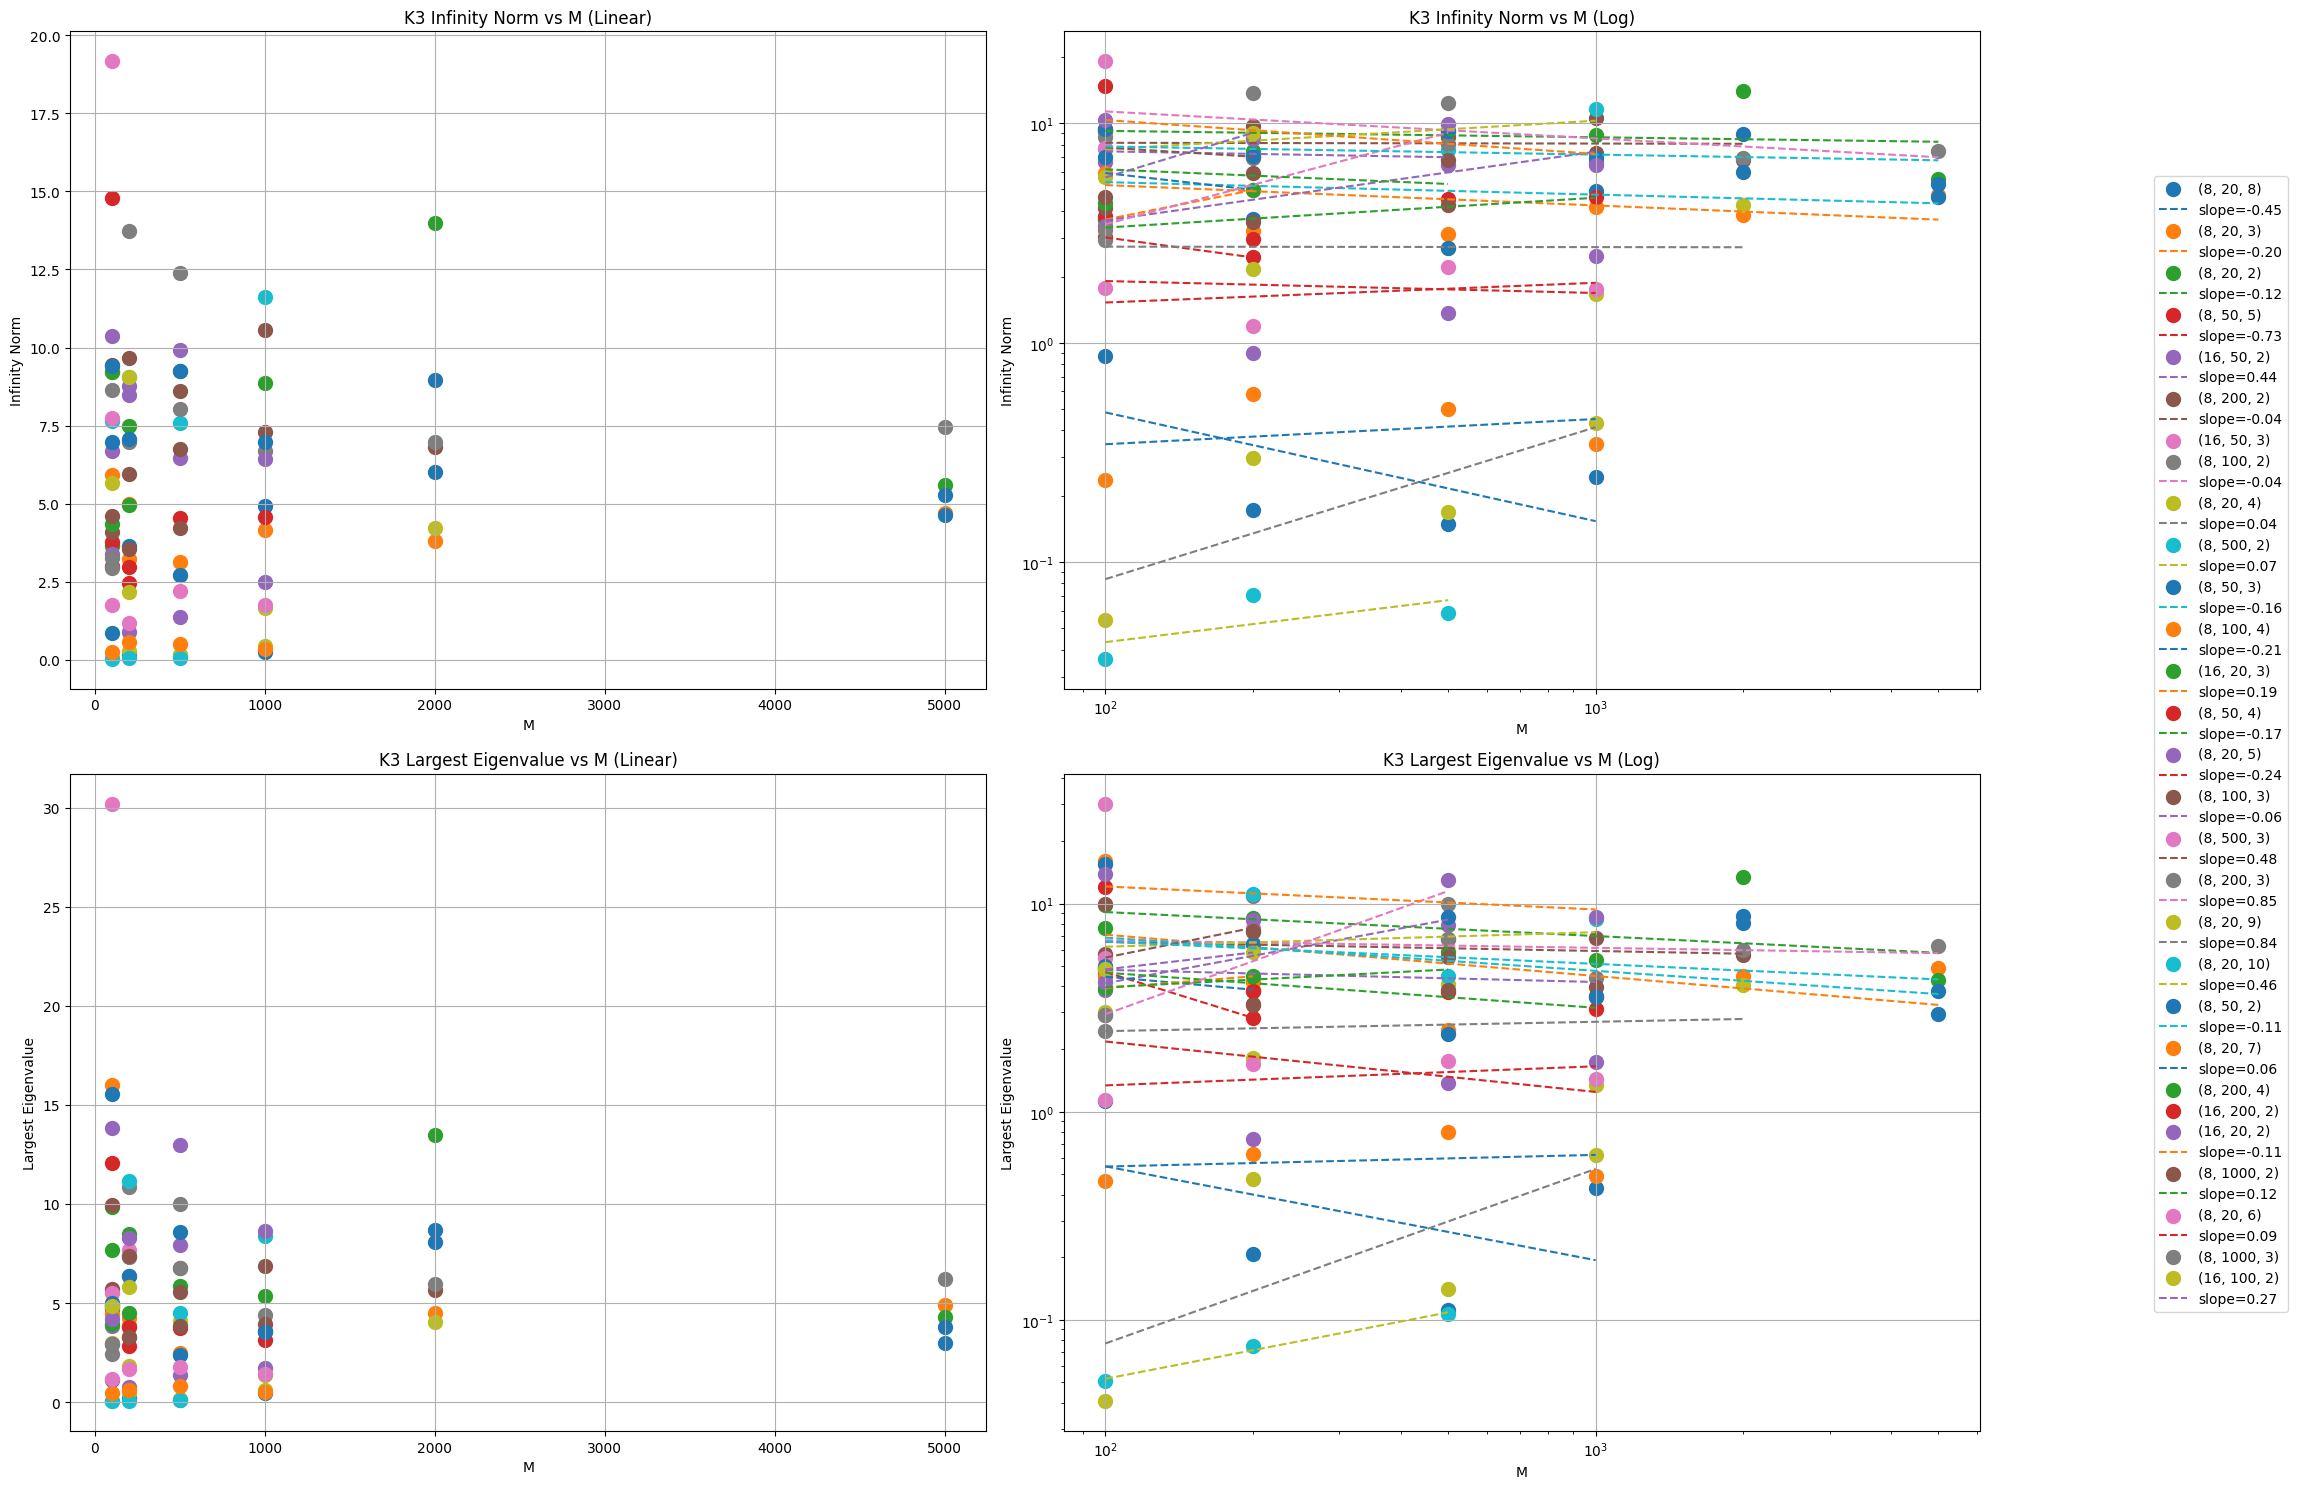

In [ ]:
# Analyze width scaling
print("Analyzing width (M) scaling relationships...")
analyze_parameter_scaling(data, 'M')

Analyzing input dimension (D_IN) scaling relationships...


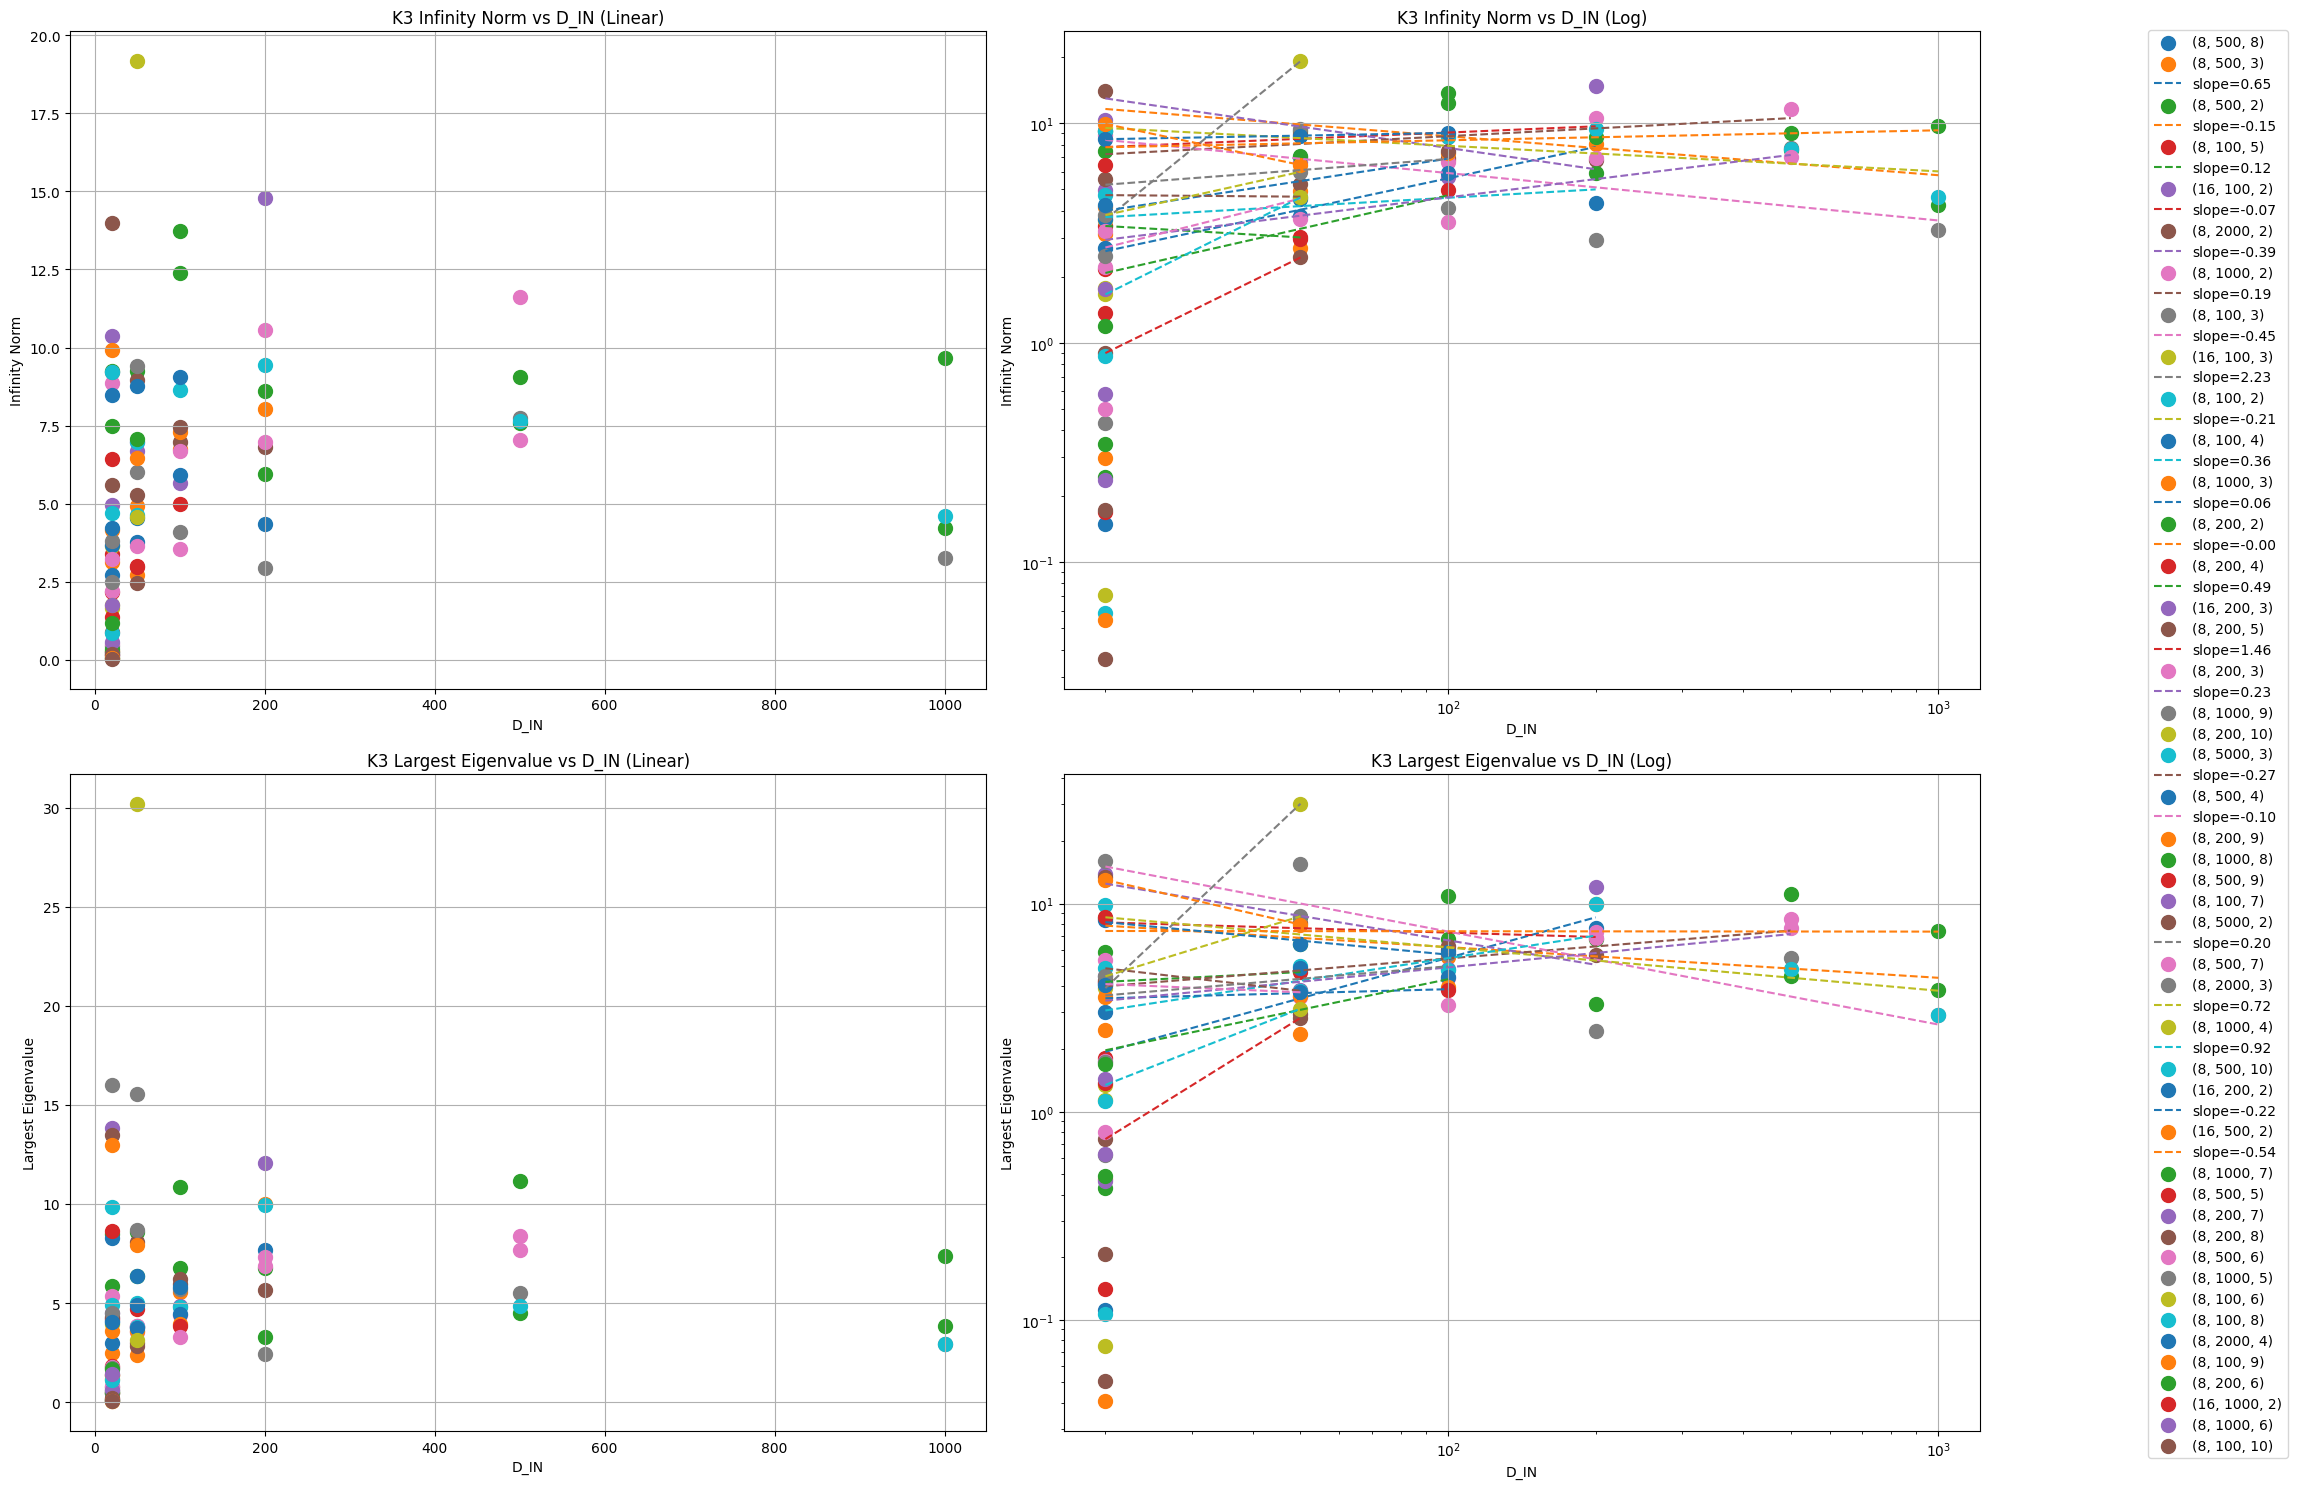

In [ ]:
# Analyze input dimension scaling
print("Analyzing input dimension (D_IN) scaling relationships...")
analyze_parameter_scaling(data, 'D_IN')

Analyzing sample size (N) scaling relationships...


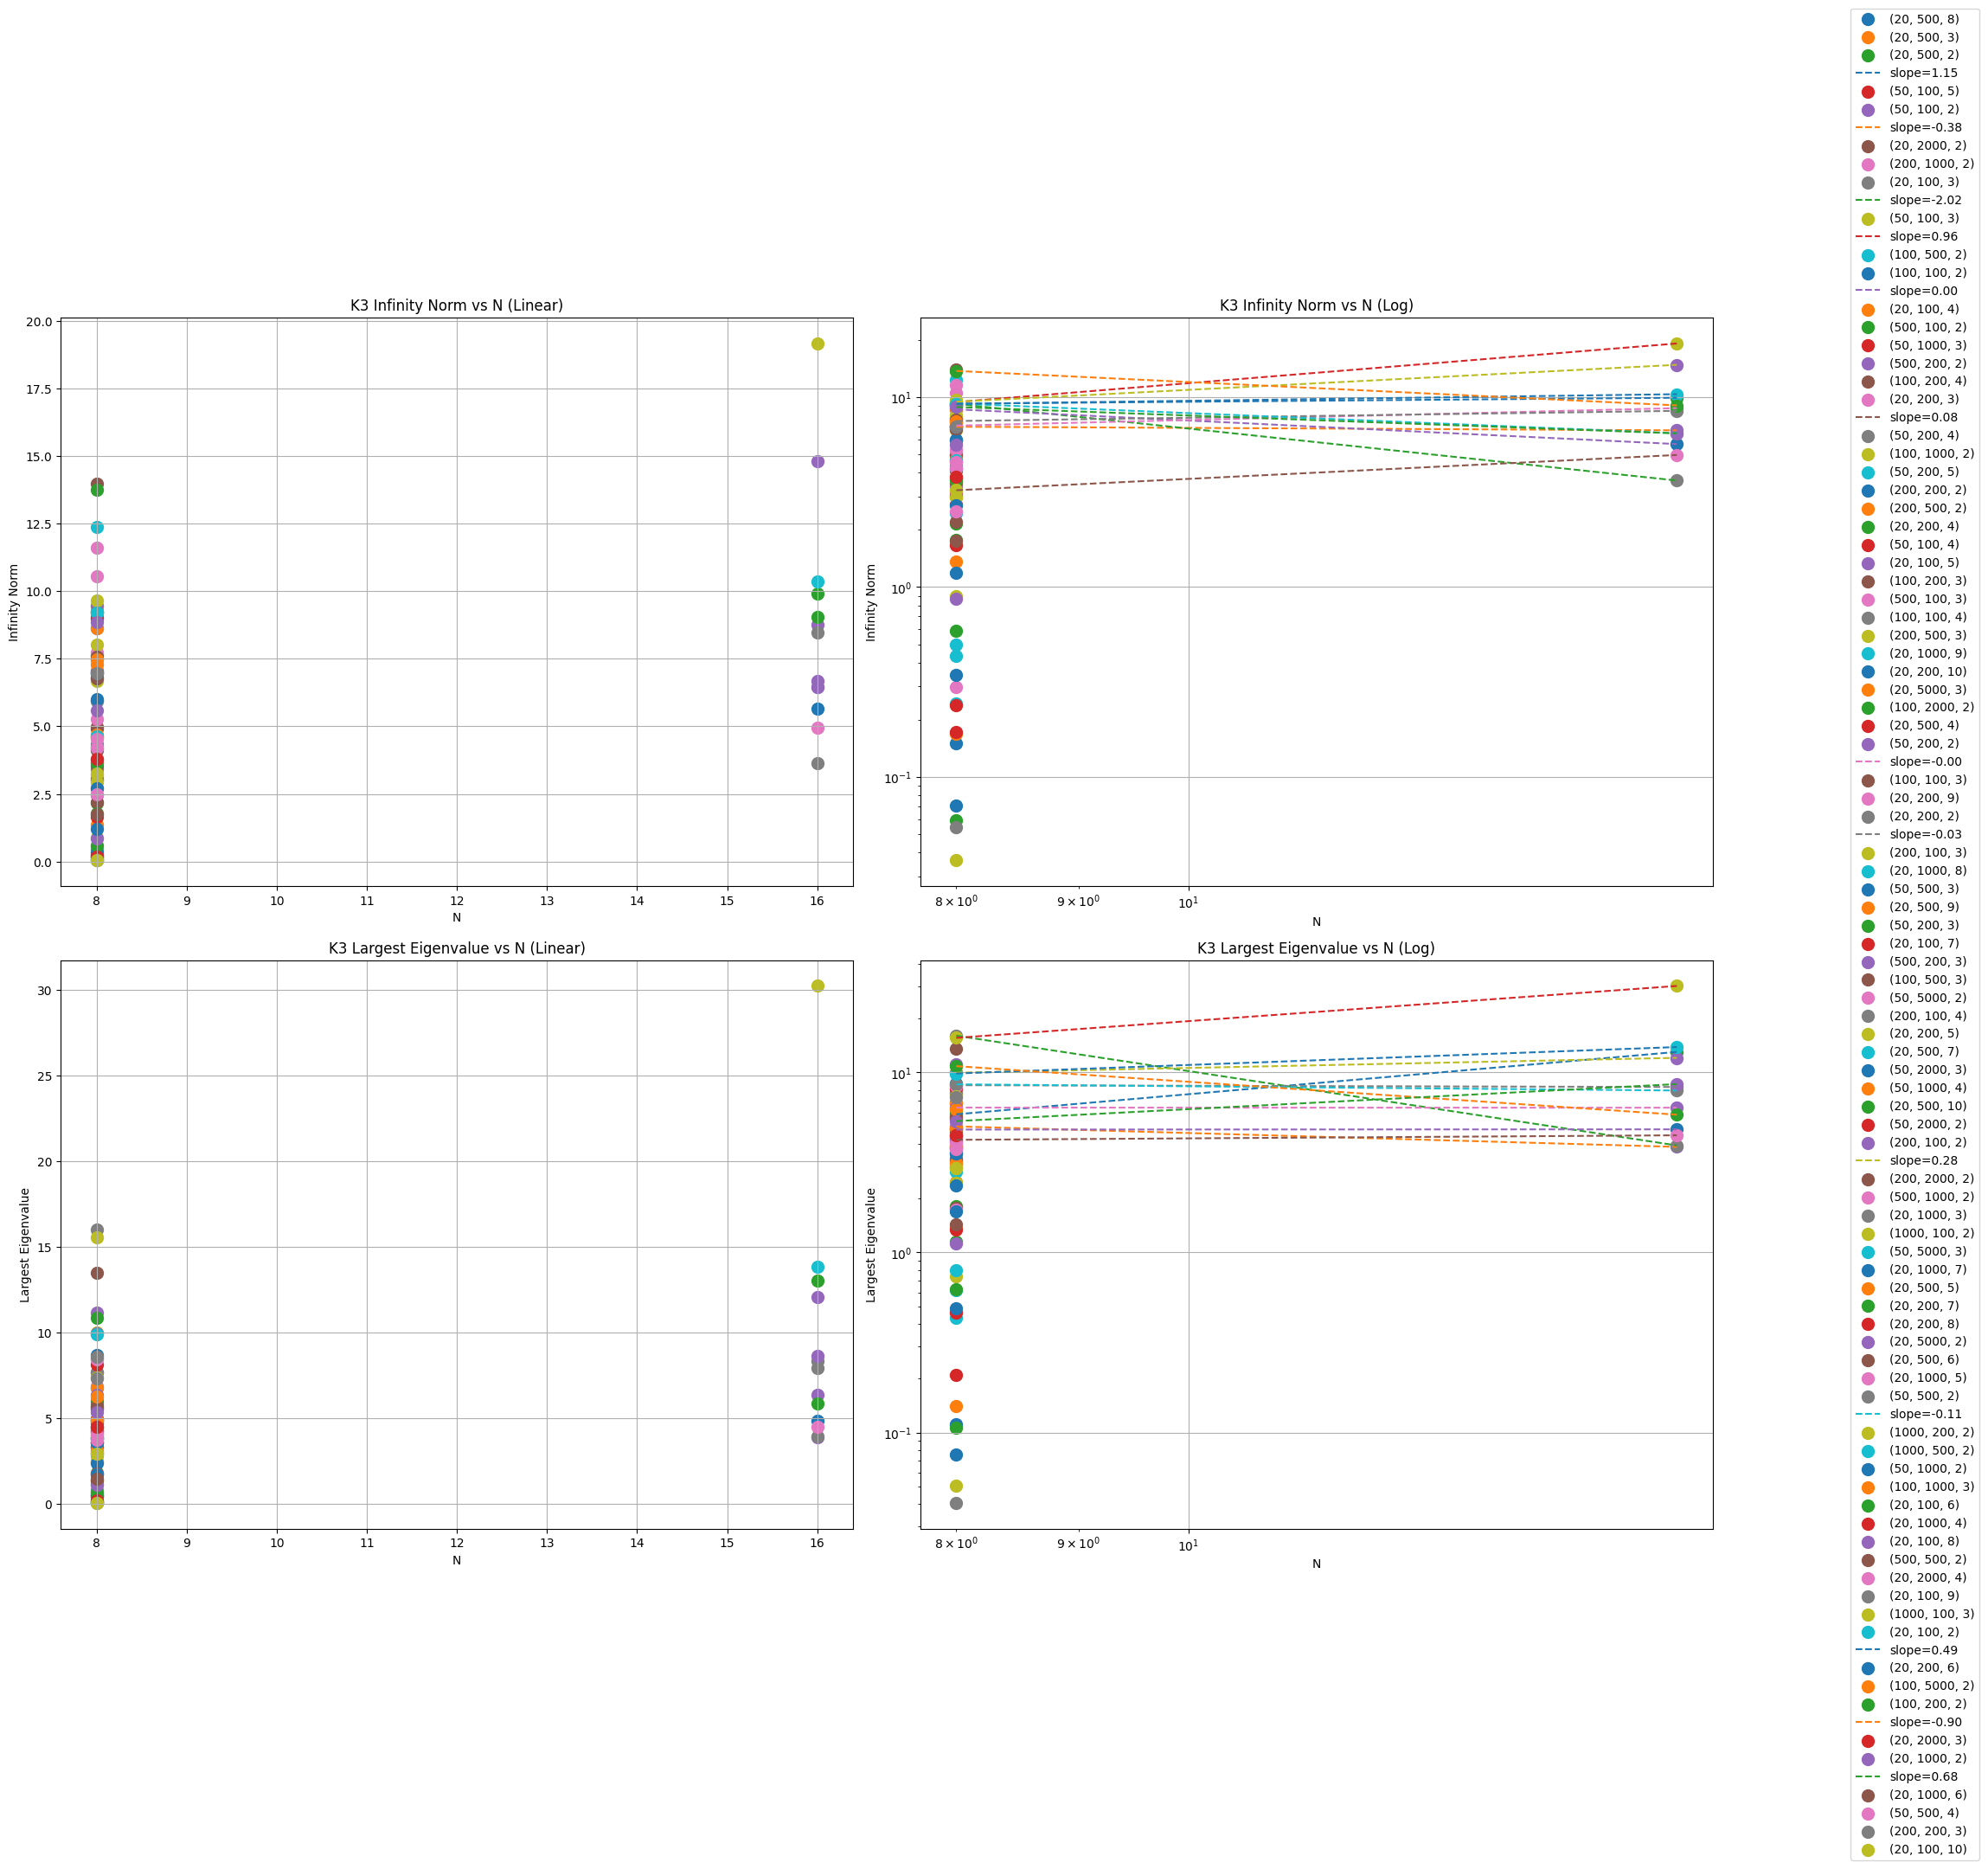

In [ ]:
# Analyze sample size scaling
print("Analyzing sample size (N) scaling relationships...")
analyze_parameter_scaling(data, 'N')

## Multivariate Regression Analysis

In [ ]:

X = np.array([[d['N'], d['D_IN'], d['M'], d['L']] for d in data])  # we extract features
y_inf = np.array([d['inf_norm'] for d in data])  # we extract infinity norm
y_eig = np.array([np.max(np.abs(d['mean_eigenvalues'])) for d in data])  # we extract max eigenvalue


X_log = np.log(X)
y_inf_log = np.log(y_inf)
y_eig_log = np.log(y_eig)


scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)


reg_inf = LinearRegression().fit(X_log_scaled, y_inf_log)
reg_eig = LinearRegression().fit(X_log_scaled, y_eig_log)



print("\nMultivariate Regression Results:")
print("\nInfinity Norm Scaling:")
print(f"R² score: {reg_inf.score(X_log_scaled, y_inf_log):.3f}")
print("Coefficients (log-log scale):")
for name, coef in zip(['N', 'D_IN', 'M', 'L'], reg_inf.coef_):
    print(f"{name}: {coef:.3f}")

print("\nLargest Eigenvalue Scaling:")
print(f"R² score: {reg_eig.score(X_log_scaled, y_eig_log):.3f}")
print("Coefficients (log-log scale):")
for name, coef in zip(['N', 'D_IN', 'M', 'L'], reg_eig.coef_):
    print(f"{name}: {coef:.3f}")


Multivariate Regression Results:

Infinity Norm Scaling:
R² score: 0.801
Coefficients (log-log scale):
N: -0.044
D_IN: -0.023
M: -0.068
L: -1.234

Largest Eigenvalue Scaling:
R² score: 0.702
Coefficients (log-log scale):
N: -0.006
D_IN: -0.070
M: -0.113
L: -1.108
